In [ ]:
# 참조: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/notebook?select=train.csv

In [ ]:
# 모델 구축을 위해 데이터를 탐색하고 분석한다

# About Dataset 

## Overview

In [ ]:
# 자전거 공유 시스템은 도시 전역의 키오스크 위치 네트워크를 통해 멤버십, 
# 대여 및 자전거 반납 프로세스가 자동화되는 자전거 대여 수단입니다. 
# 이러한 시스템을 사용하여 사람들은 한 장소에서 자전거를 빌려 필요에 따라 
# 다른 장소로 반납 할 수 있습니다. 
# 현재 전 세계적으로 500 개 이상의 자전거 공유 프로그램이 있습니다.

In [3]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
%matplotlib inline

In [13]:
dailyData = pd.read_csv("../bike/train.csv")

# Data Summary 

In [14]:
dailyData.shape

(10886, 12)

In [15]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [16]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Feature Enginerring 

In [ ]:
# 위의 결과에서 볼 수 있듯이 "season", "holiday", "workingday", "weather"열은 
# "categorical"데이터 유형이어야하지만 현재 데이터 유형은 
# 해당 열에 대해 "int"입니다. EDA를 시작할 수 있도록 다음과 같은 방법으로 
# 데이터 세트를 변환하겠습니다.

## "datetime"열에서 "date,"hour ","weekDay ","month "열을 새로 만듭니다.

In [18]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

## "season", "holiday", "workingday"및 날씨의 데이터 유형을 범주형 으로 변환 

In [19]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

## datetime 컬럼 삭제

In [20]:
dailyData = dailyData.drop(['datetime'], axis=1)

## 변수 데이터들에 대해 간단한 시각화

In [28]:
dataTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

TypeError: data type "" not understood

TypeError: data type "" not understood

<Figure size 864x360 with 1 Axes>

# Missing Value Analysis 

In [31]:
dailyData.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
date          0
hour          0
weekday       0
month         0
dtype: int64

## Skewness In Distribution

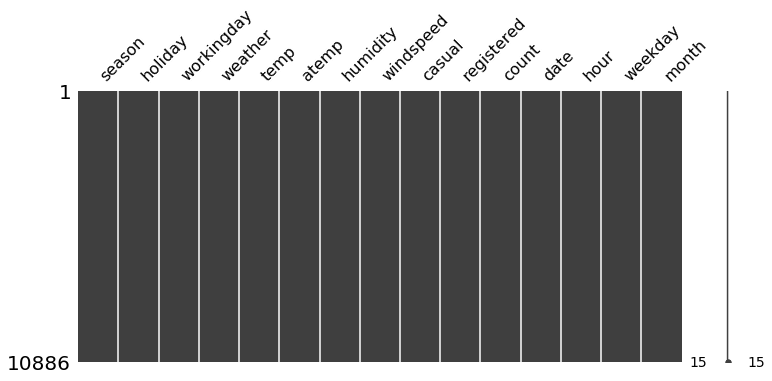

In [32]:
msno.matrix(dailyData,figsize=(12,5))

# 특이치 분석

In [ ]:
1. 봄 시즌은 상대적으로 적은 수를 기록했으며, 상자 그림의 중앙값 하락은 그 증거를 제공합니다.
2. "Hour Of The Day"가있는 상자 그림은 조용하고 흥미 롭습니다. 중앙값은 오전 7시 ~ 오전 8시 및 오후 5시 ~ 오후 6시에 상대적으로 높습니다. 당시 일반 학교 및 사무실 사용자가 원인 일 수 있습니다.
3. 대부분의 이상 점은 주로 "비 근무일"보다 "근무일"에서 기인합니다. 그림 4에서 볼 수 있듯이 조용합니다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

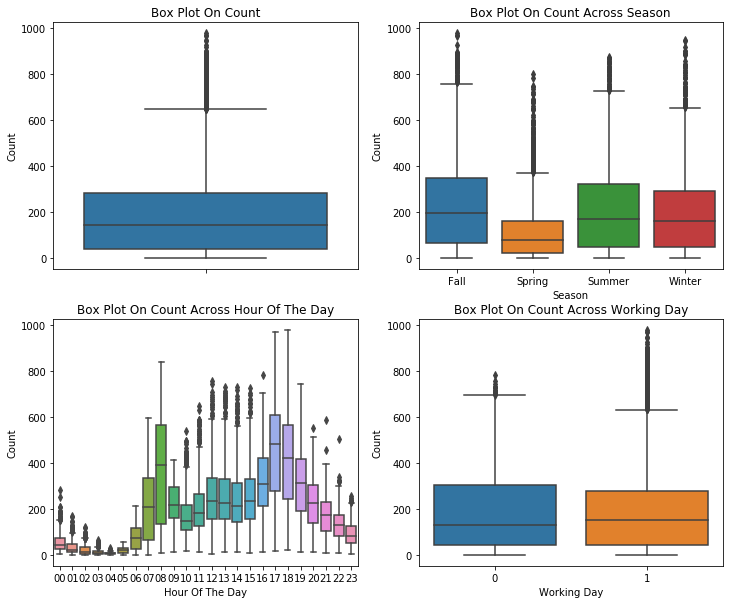

In [34]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

##  이상값 제거

In [35]:
dailyDataWithOutliers = dailyData[np.abs(dailyData['count'] - dailyData['count'].mean())<=(3*dailyData['count'].std())]

In [36]:
print("Shape Of the before ouliers:", dailyData.shape)
print("Shape of the after ouliers:", dailyDataWithOutliers.shape)

Shape Of the before ouliers: (10886, 15)
Shape of the after ouliers: (10739, 15)


#  상관분석

In [ ]:
종속 변수가 기능 (숫자)에 의해 어떻게 영향을 받는지 이해하는 일반적인 방법 중 하나는 이들 간의 상관 행렬을 확인하는 것입니다. "count"와 [ "temp", "atemp", "humidity", "windspeed"] 사이의 상관 관계 플롯을 확인한다

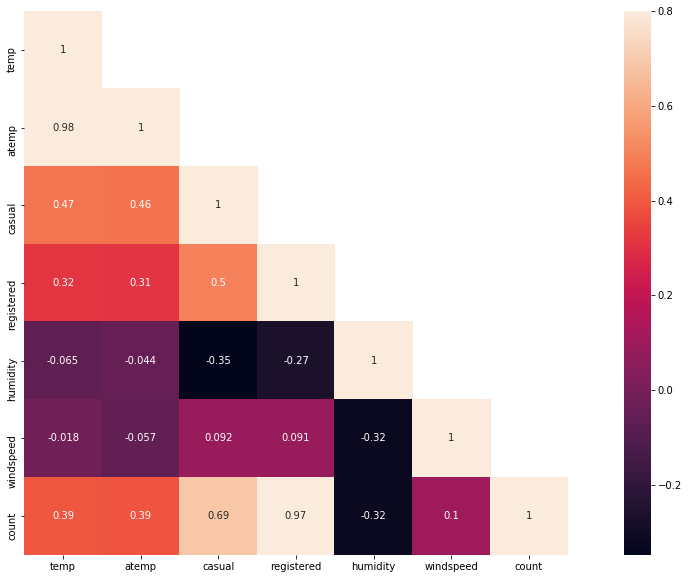

In [42]:
corrMatt = dailyData[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

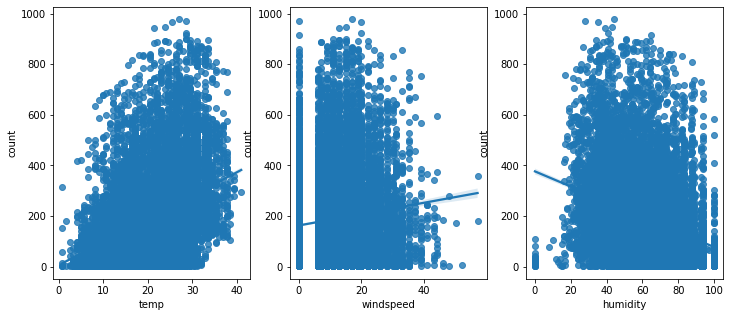

In [44]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp', y= 'count', data= dailyData, ax=ax1)
sns.regplot(x='windspeed', y= 'count', data= dailyData, ax=ax2)
sns.regplot(x='humidity', y= 'count', data= dailyData, ax=ax3)


# 데이터 분포 시각화

In [ ]:
아래 그림에서 볼 수 있듯이 "count"변수가 오른쪽으로 치우쳐 있습니다. 
대부분의 기계 학습 기술은 종속 변수가 정규 분포를 요구하므로 정규 분포를 갖는 것이 바람직합니다. 한 가지 가능한 해결책은 
이상치 데이터 포인트를 제거한 후 "count"변수에 대한 로그 변환을 수행하는 것입니다.
변환 후 데이터는 훨씬 좋아 보이지만 여전히 이상적으로는 정규 분포를 따르지 않습니다.

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229774, 4.562423868087808, 0.9581176780909615))

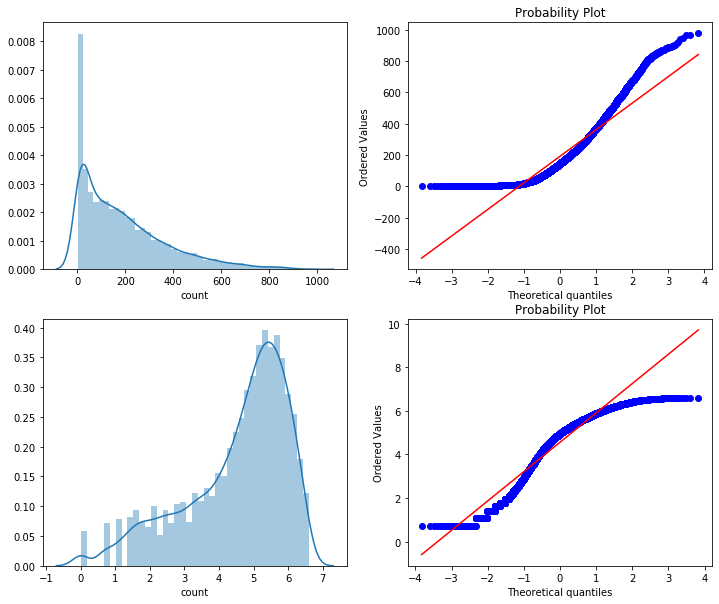

In [45]:
fig,axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)
sns.distplot(dailyData['count'],ax=axes[0][0])
stats.probplot(dailyData['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(dailyDataWithOutliers['count']),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithOutliers['count']), dist='norm',
              fit=True, plot=axes[1][1])

# Month,Season,Hour,Weekday,Usertype 시각화

[Text(0, 0.5, 'Users Count'),
 Text(0.5, 0, 'Hour Of The Day'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

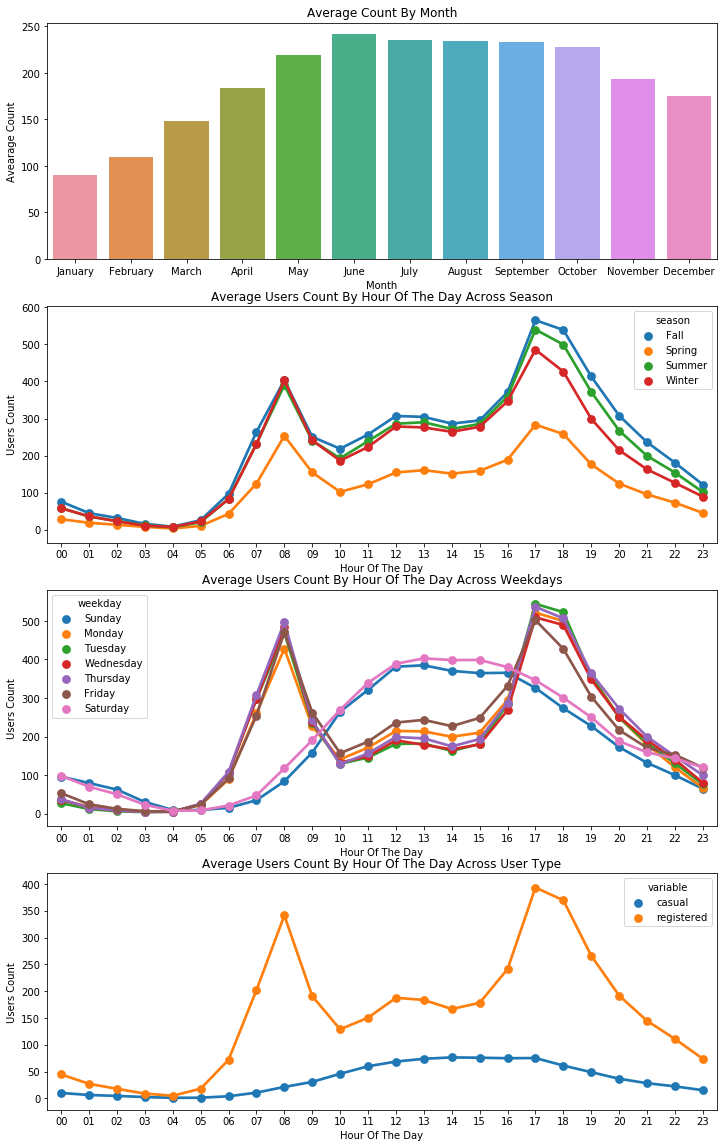

In [47]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sns.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dailyData[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

In [ ]:
1. 여름철에 자전거를 타는 것이 정말 도움이되기 때문에 사람들이 여름철에 자전거를 빌리는 경향이 있다는 것은 분명한 사실이며, 따라서 6 월, 7 월, 8 월은 상대적으로 자전거 수요가 높았습니다.
2. 평일에는 오전 7시 ~ 오후 8시, 오후 5시 ~ 오후 6시에 자전거를 빌리는 사람이 더 많습니다. 앞서 언급했듯이 이것은 정규 학교 및 사무실 통근자들 때문일 수 있습니다.
3. 위의 패턴은 "토요일"과 "일요일"에는 관찰되지 않습니다. 더 많은 사람들이 오전 10시에서 오후 4시 사이에 자전거를 빌리는 경향이 있습니다.
4. 오전 7시 ~ 오전 8시, 오후 5시 ~ 오후 6시의 최대 사용자 수는 순전히 등록 된 사용자가 기여합니다.

In [48]:
# 몇 가지 모델을 만들어 결과를 얼마나 가깝게 예측할 수 있는지 확인

# Filling 0's In windspeed Using Random Forest

In [50]:
dataTrain = pd.read_csv("../bike/train.csv")
dataTest = pd.read_csv("../bike/test.csv")

In [51]:
# 데이터 합치기
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [52]:
# Feature Engineering
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [ ]:
Windspeed에서 0을 예측하는 랜덤 포레스트 모델

In [53]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

C:\Users\junho\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [54]:
# 범주 유형으로 변환
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [55]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [56]:
# 데이터 분할
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [57]:
# Dropping Unncessary Variables

dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [58]:
# RMSLE Scorer

def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

## 선형 회귀 모델

In [59]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9779752976943382


##  정규화 모델 -Ridge

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779752826277469


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

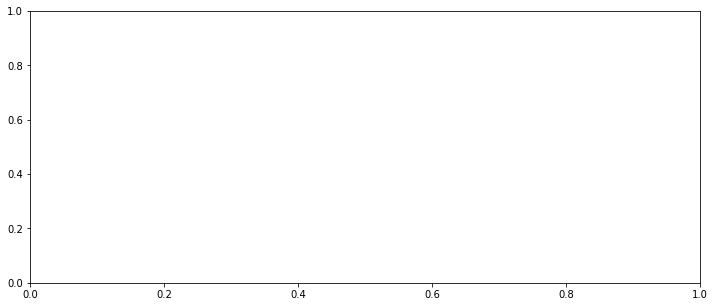

In [71]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

##  정규화모델 -Lasso

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9781121914137578


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

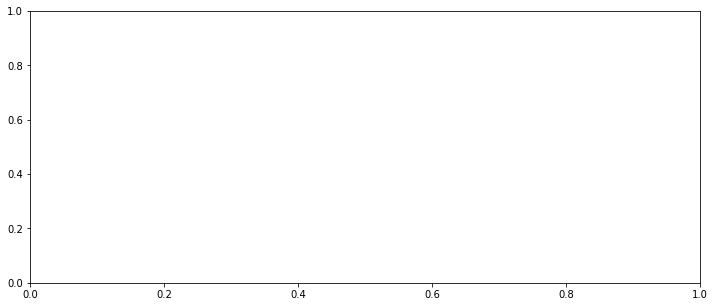

In [68]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

##  앙상블 모델 - Random Forest

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10372731027829539


## 앙상블 모델 -Gradient Boost

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.18977117224448228


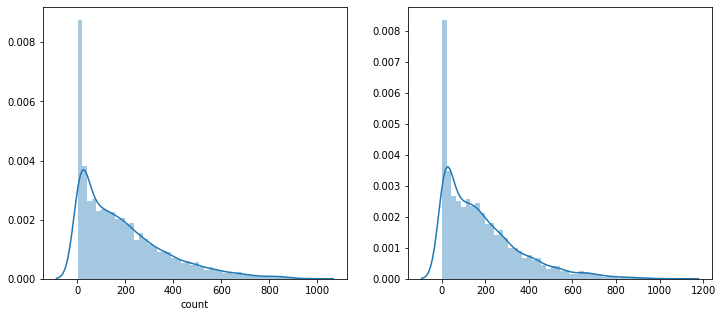

In [75]:
predsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [ ]:
train 와 test 결과를 비교해 보면 train과 test의 분포는 다소 동일 해 보이고,
그것은 모델이 정말로 나쁘게 예측하지 않았고 중대한 과적 합 문제를 겪지 않았 음을 시각적으로 확인